# *Importing the necessary libraries*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# *Importing the datasets and data exploration*

In [ ]:
# If running in google collab, please import the datasets once the script is connected to runtime.
train = pd.read_csv('train_selected.csv')
test = pd.read_csv('test_selected.csv')
train.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0


In [ ]:
train.shape

(20631, 8)

In [ ]:
train.isnull().any()

id           False
cycle        False
s1           False
s2           False
s3           False
s4           False
ttf          False
label_bnc    False
dtype: bool

In [ ]:
print("The total number of rows and columns are ",test.shape)
print("\nChecking for any null values :")
test.isnull().any()

The total number of rows and columns are  (100, 8)

Checking for any null values :


id           False
cycle        False
s1           False
s2           False
s3           False
s4           False
ttf          False
label_bnc    False
dtype: bool

In [ ]:
train.groupby('id').get_group(1)

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0
...,...,...,...,...,...,...,...,...
187,1,188,1422.78,551.94,48.00,519.79,4,1
188,1,189,1428.01,550.70,48.08,519.58,3,1
189,1,190,1425.95,551.29,48.33,520.04,2,1
190,1,191,1425.77,550.92,48.15,519.57,1,1


### *Correlation Matrix*

In [ ]:
# Plotting the co-relation matrix
co_relation_matrix= train.corr()
co_relation_matrix.style.background_gradient(cmap='coolwarm')

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
id,1.000000,0.078753,0.026116,-0.032073,0.024707,-0.031882,0.078753,-0.014482
cycle,0.078753,1.000000,0.624577,-0.595914,0.634385,-0.611354,-0.736241,0.503679
s1,0.026116,0.624577,1.000000,-0.793130,0.830136,-0.815591,-0.678948,0.648406
s2,-0.032073,-0.595914,-0.793130,1.000000,-0.822805,0.812713,0.657223,-0.625592
s3,0.024707,0.634385,0.830136,-0.822805,1.000000,-0.846884,-0.696228,0.665655
s4,-0.031882,-0.611354,-0.815591,0.812713,-0.846884,1.000000,0.671983,-0.640174
ttf,0.078753,-0.736241,-0.678948,0.657223,-0.696228,0.671983,1.000000,-0.566596
label_bnc,-0.014482,0.503679,0.648406,-0.625592,0.665655,-0.640174,-0.566596,1.000000


### *Box Plot*

<Axes: xlabel='s1'>

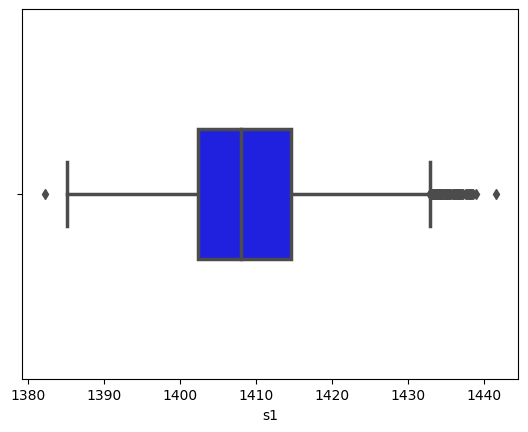

In [ ]:
# Plotting box plot for all the sensors. This helps to find the outliers in each sensors
sns.boxplot(data=train,x='s1',orient='h',linewidth=2.5,color='blue',width=0.35)

<Axes: xlabel='s2'>

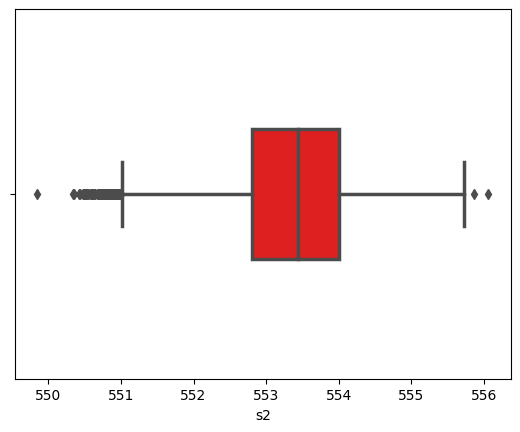

In [ ]:
sns.boxplot(data=train,x='s2',orient='h',linewidth=2.5,color='red',width=0.35)

<Axes: xlabel='s3'>

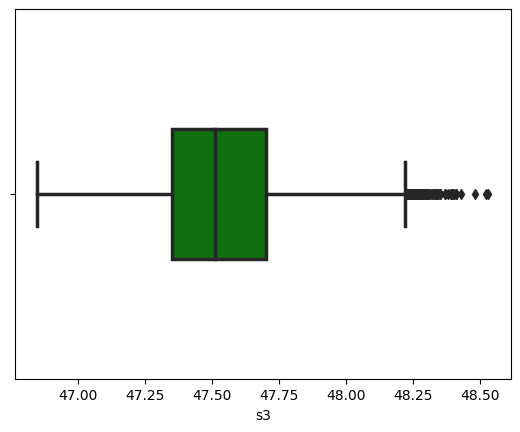

In [ ]:
sns.boxplot(data=train,x='s3',orient='h',linewidth=2.5,color='green',width=0.35)

<Axes: xlabel='s4'>

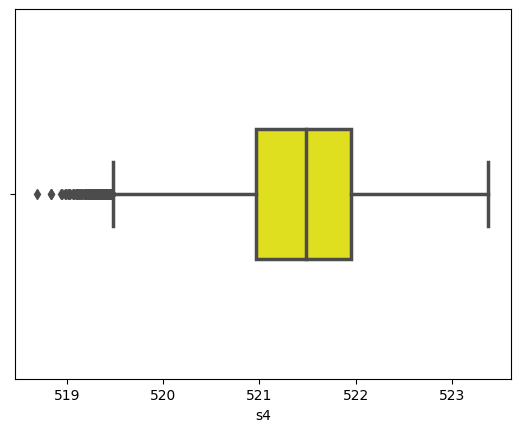

In [ ]:
sns.boxplot(data=train,x='s4',orient='h',linewidth=2.5,color='yellow',width=0.35)

### *Scatter Plots*

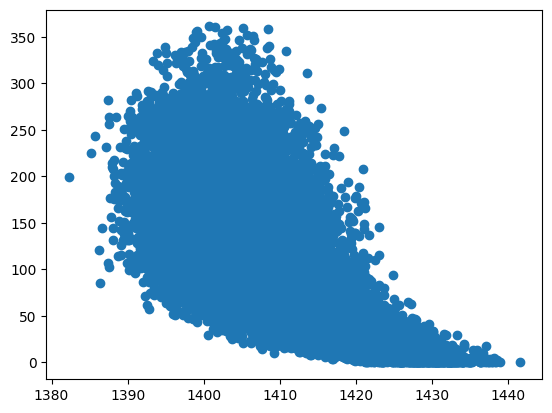

In [ ]:
# Plotting scatter plot for all the sensors. This helps to undertand the nature of each sensors.
plt.scatter(train['s1'],train['ttf'])
plt.show()

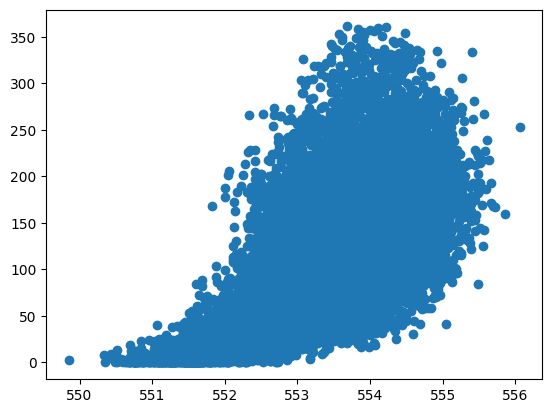

In [ ]:
plt.scatter(train['s2'],train['ttf'])
plt.show()

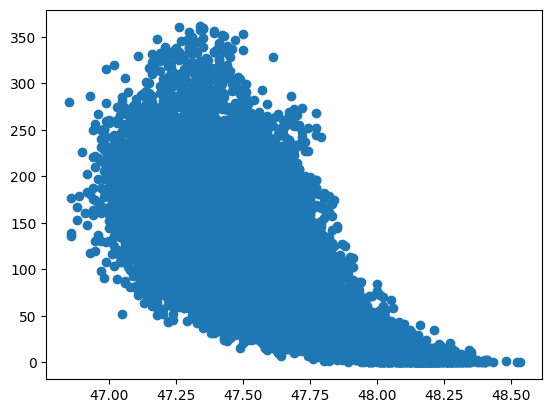

In [ ]:
plt.scatter(train['s3'],train['ttf'])
plt.show()

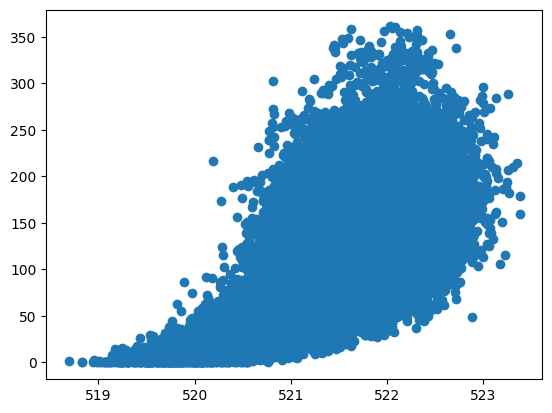

In [ ]:
plt.scatter(train['s4'],train['ttf'])
plt.show()

### *Sensors vs TTF*

In [ ]:
def plot_sensor(sensor_name,X):
    plt.figure(figsize=(10,5))
    for i in X['id'].unique():
        if (i % 10 == 0):  # only plot every engine
            plt.plot('ttf', sensor_name,
                     data=X[X['id']==i].rolling(8).mean())
            plt.axvline(30, color='red', linestyle='dashed', linewidth=2)
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('TTF')
    plt.show()

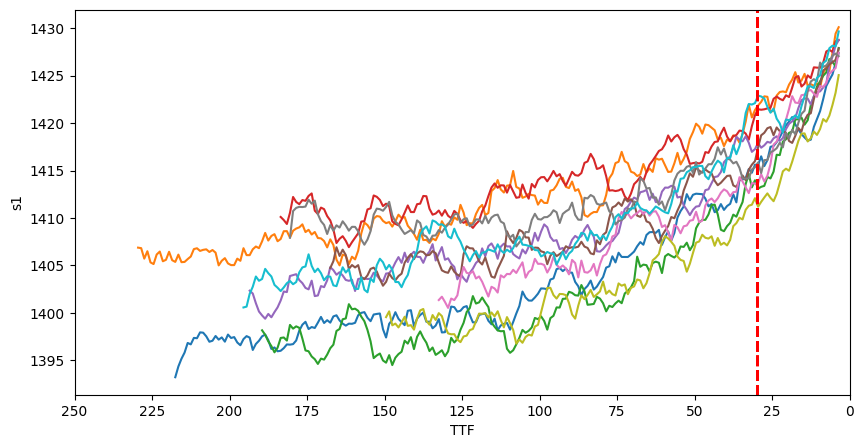

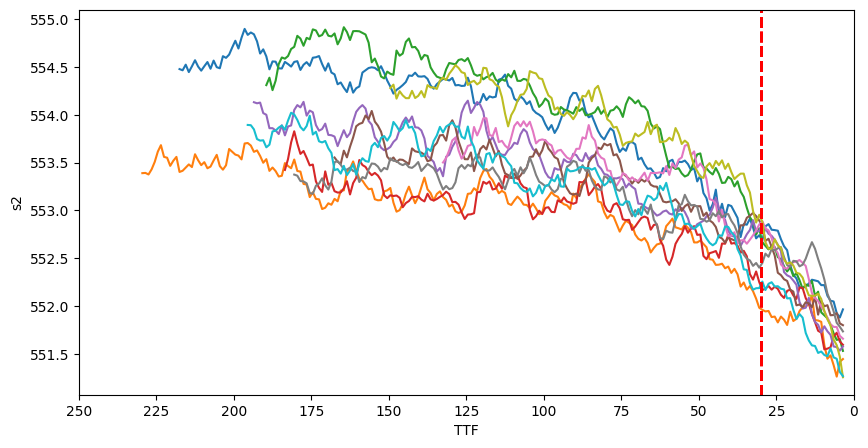

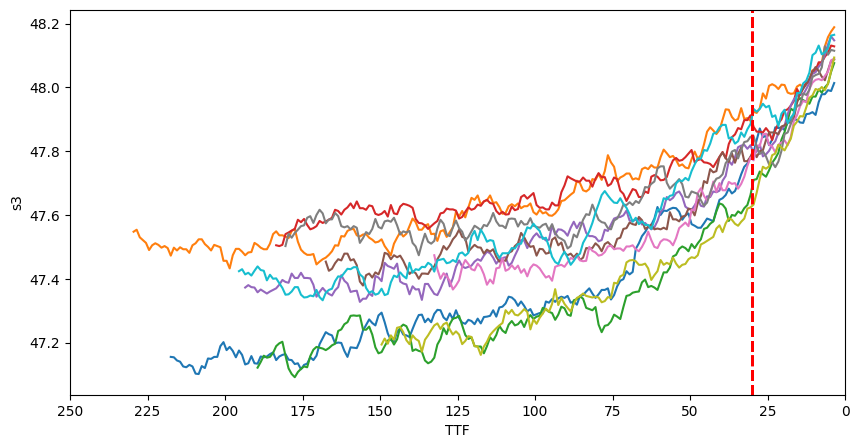

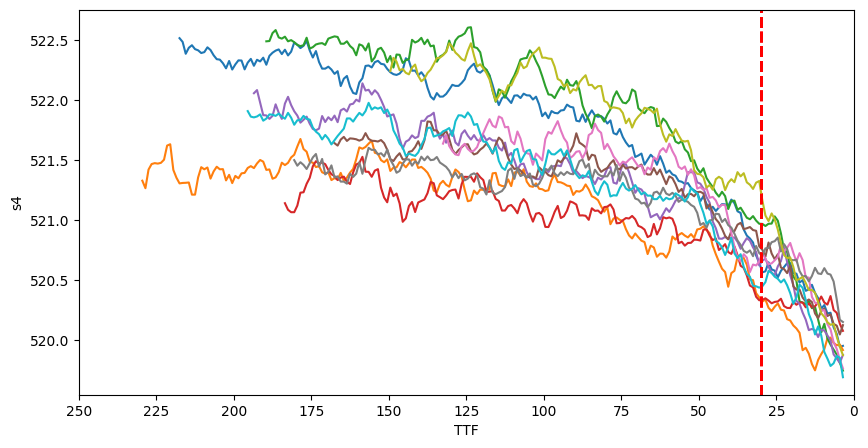

In [ ]:
for sensor in train.drop(['id','cycle','ttf','label_bnc'], axis=1).columns:
    plot_sensor(sensor, train)
    print('\n')

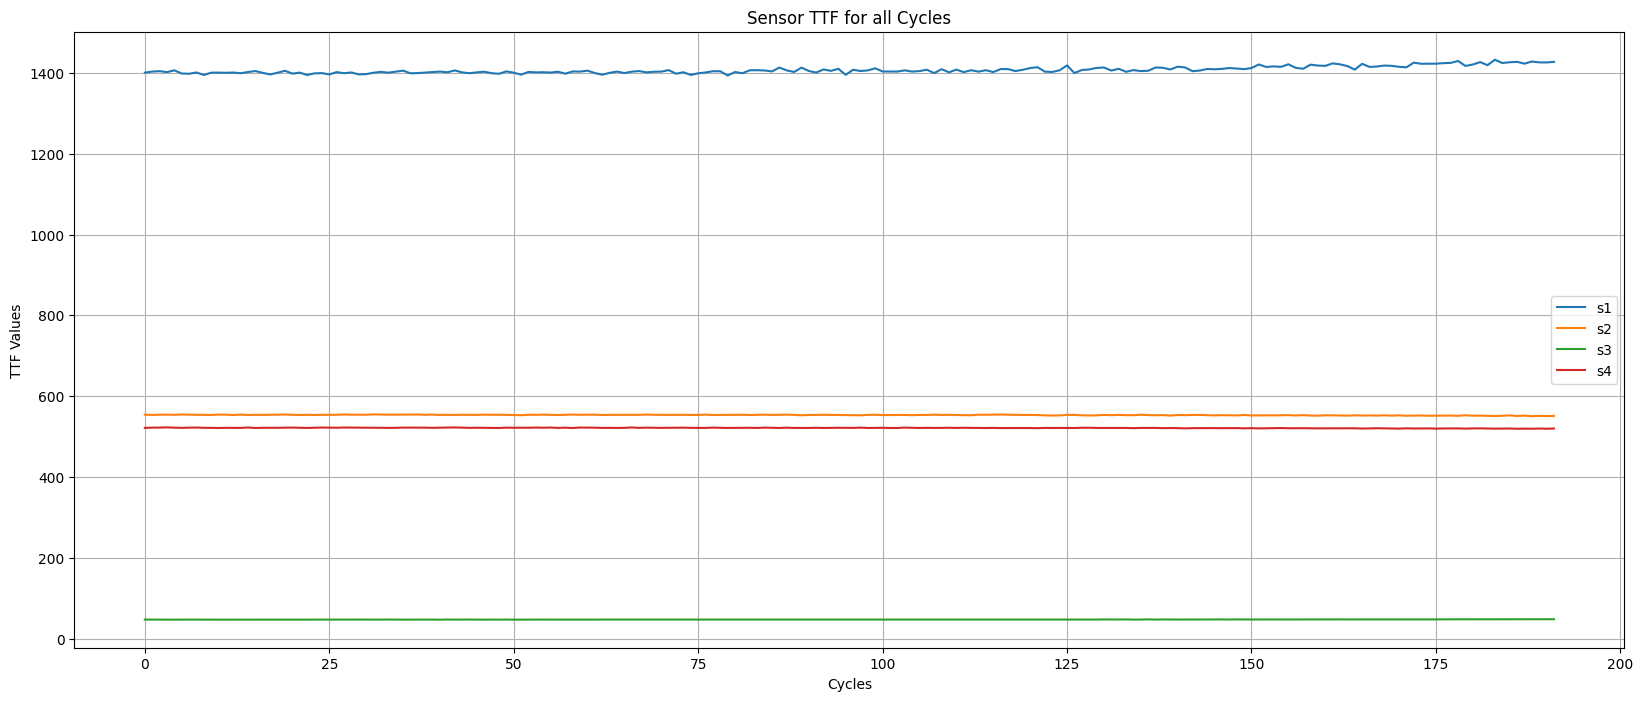

In [ ]:
cols_names = ['id', 'cycle', 's1', 's2', 's3','s4', 'ttf', 'label_bnc']
train.columns = cols_names
sensor_cols = cols_names[2:6]
train[train.id==1][sensor_cols].plot(figsize=(20, 8))
plt.xlabel('Cycles')
plt.ylabel('TTF Values')
plt.title('Sensor TTF for all Cycles')
plt.grid()

### *Multivariate Analysis*

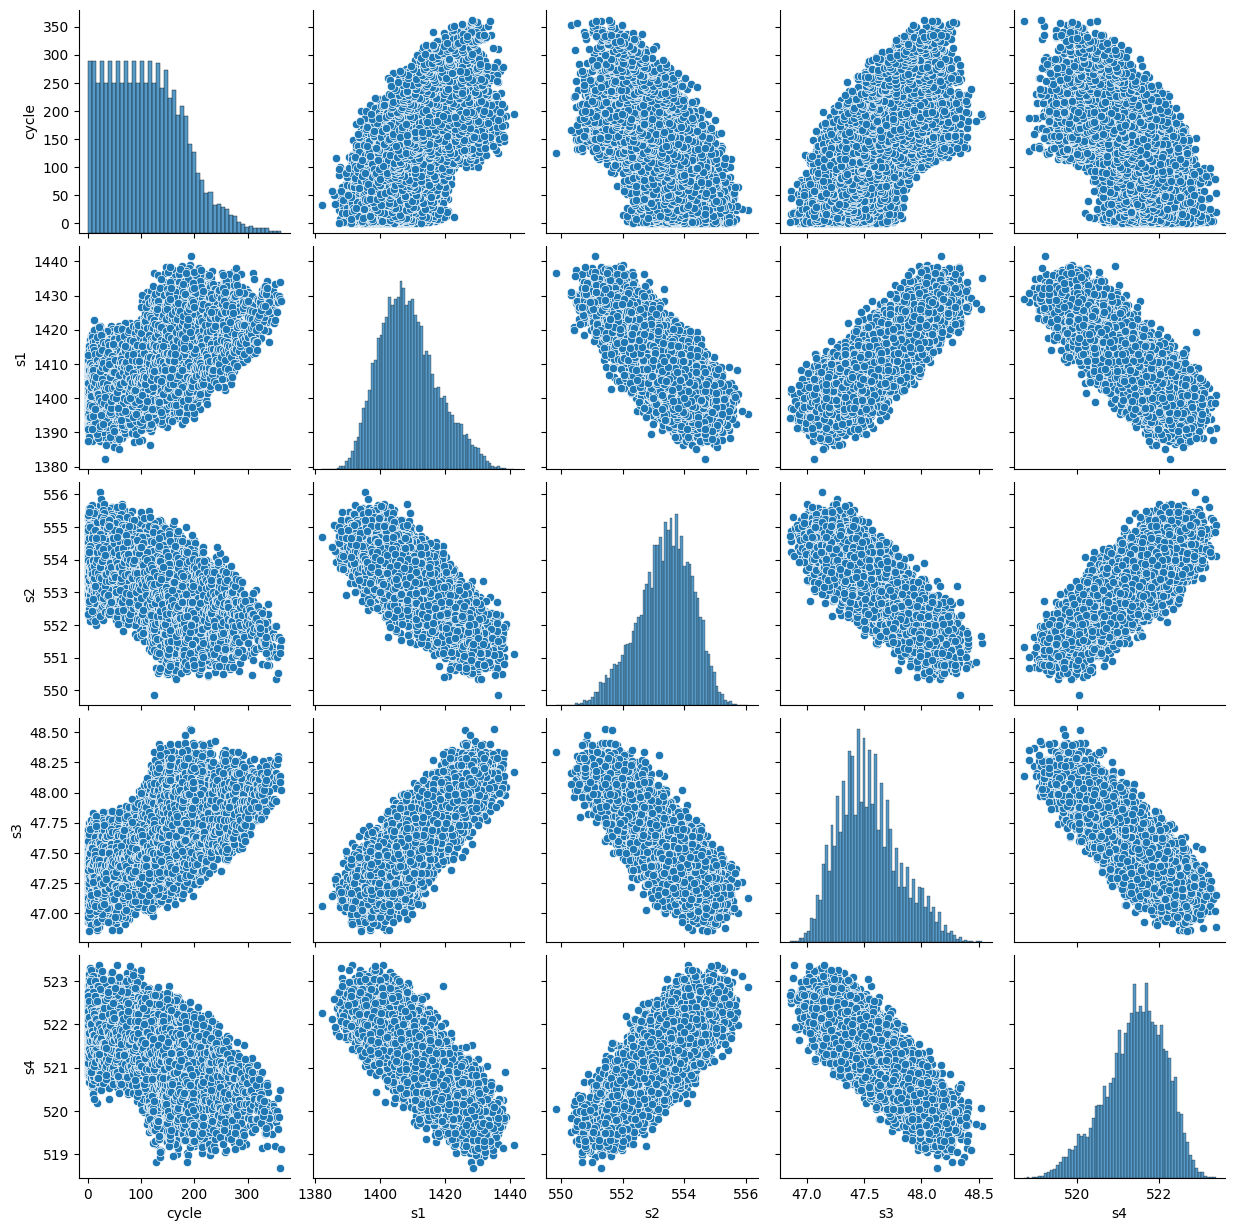

In [ ]:
train = train.drop(['id'],axis=1)
train = train.drop(['ttf'],axis=1)
train = train.drop(['label_bnc'],axis=1)

sns.pairplot(train)

### *Creating the train and test set of the datatsets for the model*

In [ ]:
x = train[['cycle','s1','s2','s3','s4']]                   # Feature set for the train_selected dataset
y = train['ttf']                                           # Dependent set for the train_selected dataset
# x
# y

In [ ]:
x_test_set = test[['cycle','s1','s2','s3','s4']]           # Feature set for the test_selected dataset
y_test_set = test['ttf']                                   # Dependent set for the train_selected dataset
# x_test_set
# y_test_set.shape

# *Defining Functions*

In [ ]:
def calculate_score(a,b,c):
  maximum=0
  for i,value in enumerate(r2_scores):
    if value>maximum:
      maximum=value
      index=i

  print(f"R-squared (Regression Score) = {max(a)}")
  print(f"Mean Squared Error (MSE) = {b[i]}")
  print(f"Root Mean Squared Error (RMSE) = {c[i]}")
  print("\n")

  return max(a)
  # print(f"ROC = {roc_curve(a,b)}")

In [ ]:
def feature_imp(model):
  importances = model.feature_importances_
  indices = np.argsort(importances)

  fig, ax = plt.subplots()
  ax.barh(range(len(importances)), importances[indices])
  ax.set_title("Feature Importance", fontsize=14)
  ax.set_yticks(range(len(importances)))
  _ = ax.set_yticklabels(np.array(x.columns)[indices])

# *XGB Boost*

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
param_grid = {'n_estimators': [100],'learning_rate': [0.1],'max_depth': [5],'subsample': [0.5],'colsample_bytree': [0.9],'colsample_bylevel': [0.5],'booster':['gbtree'],'eta':[0.5],
              'base_score':[0.9],'max_delta_step':[9],'alpha':[0.9]}
xgb_model = XGBRegressor()  # Create an XGBRegressor
grid_search = GridSearchCV(xgb_model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=1)  # Use GridSearchCV for hyperparameter tuning
grid_search.fit(x, y)
best_params = grid_search.best_params_  # Get the best hyperparameters from the grid search
best_xgb_model = grid_search.best_estimator_  # Use the best model from the grid search
# print(best_xgb_model)
xgb_pred = best_xgb_model.predict(x_test_set) # Predict on the test set
print("The model prediction with the best estimators is\n",xgb_pred)
print("\n")
# Evaluate the model using R-squared
r2 = r2_score(y_test_set, xgb_pred)
print(f"R-squared (Regression Score) = {r2}")
# Evaluate the model using MSE
mse = mean_squared_error(y_test_set, xgb_pred)
print(f"Mean Squared Error (MSE) = {mse}")
# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test_set,xgb_pred))
print(f"Root Mean Squared Error (RMSE) = {rmse}")

The model prediction with the best estimators is
 [90.900085  90.900085  38.000595  90.900085  85.26736   90.900085
 87.71667   63.397438  90.900085  83.56669   89.10008   85.699394
 77.14676   89.56966   90.900085  90.900085  76.58893   65.66322
 89.25928   16.194494  89.647     90.900085  90.801956  61.266655
 90.900085  90.900085  85.28392   81.65735   86.61308   74.479065
 14.614654  89.647     89.16626    4.061577   7.5132465 23.500767
 75.68139   67.60872   90.900085  27.58548   61.72244   13.705964
 48.195618  90.900085  72.853615  65.58562   90.900085  90.900085
 19.714901  90.900085  86.27501   72.49825   48.053875  90.801956
 90.900085  14.656744  71.98594   48.89461   90.900085  86.801346
 48.19715   86.873924  54.568474  42.872475  90.900085  21.277092
 90.900085  13.043572  90.900085  77.71387   90.900085  86.150635
 90.900085  77.47864   90.900085  15.007775  31.32807   90.900085
 90.900085  82.800995   6.180355   8.524674  90.900085  69.585945
 90.900085  90.900085  90.9

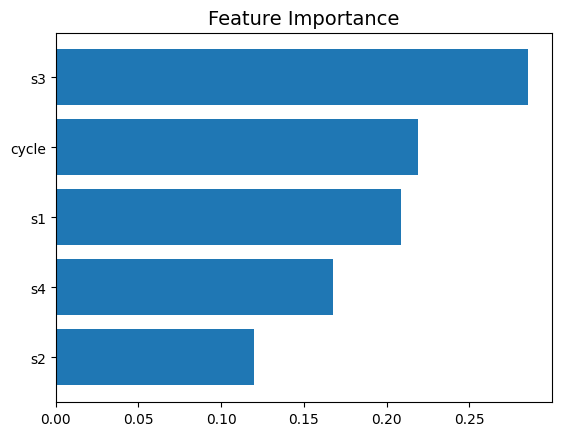

In [ ]:
feature_imp(best_xgb_model)

# *Random Forest*

In [ ]:
estimator = RandomForestRegressor(random_state=0)
param_grid = {"n_estimators":[100],"max_features":[4,5],"max_depth":[5,6],'min_samples_leaf': [10,15], 'min_samples_split': [20,25]}
search=GridSearchCV(estimator, param_grid,cv=2,scoring='r2')
result= search.fit(x,y)
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
best_model=search.best_estimator_
print(best_model)

RandomForestRegressor(max_depth=5, max_features=4, min_samples_leaf=15,
                      min_samples_split=20, random_state=0)


In [ ]:
# Set up k-fold cross-validation
k_folds = 10  # You can change this to your desired number of folds
kf = KFold(n_splits=k_folds, shuffle=True, random_state=0)
# Initialize linear regression model
model= best_model
# Lists to store the mean squared errors for each fold
mse_scores = []
r2_scores = []
rmse_scores = []

for train_index, val_index in kf.split(x):
    X_train_fold, X_val_fold = x.iloc[train_index], x.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model.fit(X_train_fold, y_train_fold) # Fit the model on the training data
    y_val_pred = model.predict(x_test_set)  # Predict on the validation set

    rmse = mean_squared_error(y_test_set, y_val_pred, squared=False)  # Calculate mse, rmse and r2_score for the fold
    mse = mean_squared_error(y_test_set, y_val_pred)
    r2 = r2_score(y_test_set, y_val_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

print("The model prediction with the best estimators is\n",y_val_pred,"\n")
# calculate_score(r2_scores,mse_scores,rmse_scores)
r2_score_rf = calculate_score(r2_scores,mse_scores,rmse_scores)

The model prediction with the best estimators is
 [176.9234539  149.32060018  33.88702078  84.66351393  84.74862613
  90.0277839  103.54328953  73.94729127 136.91939527  90.18827509
  99.71308858 100.65357421  71.18466261 152.23683277 149.42859304
 119.5386866   78.93479693  50.78756927 106.10201259  21.01092792
 102.68534632 163.23596849 120.94802236  48.89026538 154.02536911
 129.42348809  96.24305399  89.13833224 105.7569148   78.64288997
  34.00796597  99.79873795 141.57841478   8.30879329   8.31102822
  26.94195228  57.98175364  55.60479142 173.69426519  30.04399854
  61.90970991  22.07041976  60.88696292 139.10783058  75.9515285
  58.4946099  119.99840432 120.80804538  11.7206929  127.98094136
  85.52143302  76.36622863  48.63142671 122.87787238  98.269135
  22.94919504  81.00032054  47.62385467 131.46834171  93.24392989
  55.29815216  83.47051588  58.05801237  47.8198301  155.78631622
  23.56622275 138.09060821  10.18143668 148.84251444  68.54759891
 149.86048297  66.79019597 12

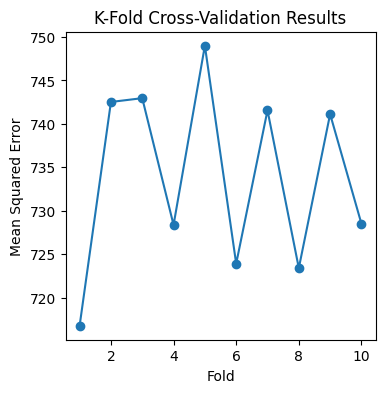

Text(0, 0.5, 'R2')

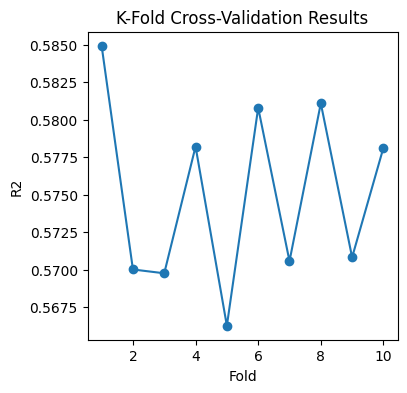

In [ ]:
# Plot the k-fold cross-validation results
plt.figure(figsize=(4, 4))
plt.plot(range(1, k_folds + 1), mse_scores, marker='o')
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.show()
plt.figure(figsize=(4, 4))
plt.plot(range(1, k_folds + 1), r2_scores, marker='o')
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('R2')

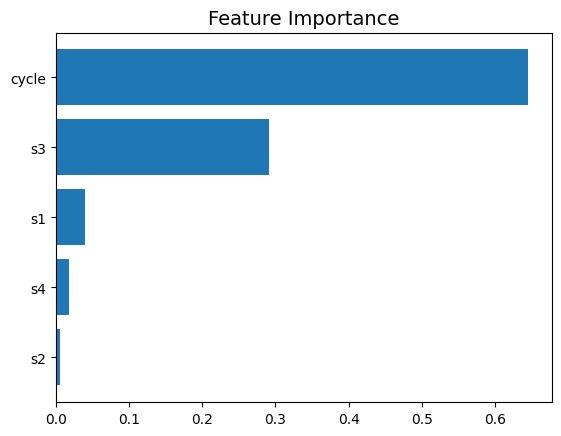

In [ ]:
feature_imp(best_model)

# *GRAPHS*

# *Model Comparison*

In [ ]:
trace1 = go.Bar(
         x = np.array("XGBoost Model"),
         y = np.array(r2),
         name = "XGBoost Model",
         marker = dict(color ='green',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
trace2 = go.Bar(
         x = np.array("Random Forest"),
         y = np.array(r2_score_rf),
         name = "Random Forest",
         marker = dict(color ='violet',
         line=dict(color='rgb(0,0,0)',width=1))
                    )

data = [trace1,trace2]
layout = go.Layout(barmode = "group",title="Machine Learning Classification Models Comparison")
fig = go.Figure(data = data, layout = layout)
iplot(fig)